In [1]:
!pip install numpy pandas seaborn matplotlib scikit-learn imblearn scipy lightgbm xgboost keras tensorflow shap deslib statsmodels scikit_posthocs orange3==3.30

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 6.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached docutils-0.21.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached commonmark-0.9.1-py2.py3-none-any.whl.metadata (5.7 kB)
INFO: pip is looking at multiple versions of orange-widget-base to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 55.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 101.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 115.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━

# Cross Validating to find results

In [1]:
from dataHandling import LoadData # Load the both the data set as well as the external validation data set
X,y,X_200,y_200 = LoadData()

In [2]:
from resultFunctions import CrossValidate # Cross validate and gather all results for the specified model
modelName = 'LR'
dfTrainResults, dfValResults, df200Results, dfValROC, df200ROC, dfValPR, df200PR, dfValPreds, df200Preds, bestModel, X_val, y_val, dfValCalib, df200Calib = CrossValidate(modelName, X, y, X_200, y_200) #Cross Validation for Logistic Regression 
 

/work/Machine Learning Algorithms/Functions/Lung-Cancer-Detection-main/resultFunctions.py:96: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfTrainResults = pd.concat([dfTrainResults, pd.DataFrame({'accuracy': [clf.score(X_train, y_train)]})], ignore_index=True)
/work/Machine Learning Algorithms/Functions/Lung-Cancer-Detection-main/resultFunctions.py:119: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfValCalib = pd.concat([dfValCalib, pd.DataFrame({
/work/Machine Learning Algorithms/Functions/L

# Save all results into files

In [3]:
import pandas as pd
from resultFunctions import Predictions
dfValResults = pd.concat([dfValResults, pd.DataFrame(dfValResults.mean()).T.rename(index={0: 'mean'})])  #Find mean for each metric
df200Results = pd.concat([df200Results, pd.DataFrame(df200Results.mean()).T.rename(index={0: 'mean'})]) #Find mean for each metric

dfBestModelLastFoldPreds = pd.DataFrame(columns=['prediction', 'probability', 'actual']) # Create dataframe on last fold for predictions
dfBestModelLastFoldPreds = Predictions(dfBestModelLastFoldPreds, X_val, y_val, bestModel) # Gather results for the prediction plot

dataframes=[dfTrainResults, 
            dfValResults, 
            df200Results, 
            dfValROC, 
            df200ROC, 
            dfValPR, 
            df200PR,
            dfValPreds,
            df200Preds,
            dfBestModelLastFoldPreds,
            dfValCalib, 
            df200Calib] # Creation of a list of all data frames

filenames=['Train_Results',
          'Val_Results',
          '200_Results',
          'Val_ROC',
          '200_ROC',
          'Val_PR',
          '200_PR',
          'ValPreds',
          '200Preds',
          'BestModelLastFoldPreds',
           'ValCalib', 
           '200Calib'] # List of names that all the files should be named

from fileFunctions import SaveFile
SaveFile(dataframes, filenames) #Save all files into current working directory

file Train_Results is saved
file Val_Results is saved
file 200_Results is saved
file Val_ROC is saved
file 200_ROC is saved
file Val_PR is saved
file 200_PR is saved
file ValPreds is saved
file 200Preds is saved
file BestModelLastFoldPreds is saved
file ValCalib is saved
file 200Calib is saved


In [4]:
from specialistPerformance import SpecialistsResults
dfResults=SpecialistsResults() # Calculate metrics for the specialists 
dfResults.to_pickle('Specialists.pkl')
dfResults

/work/Machine Learning Algorithms/Functions/Lung-Cancer-Detection-main/specialistPerformance.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfResults[specialistName].loc['TP']=TP
/work/Machine Learning Algorithms/Functions/Lung-Cancer-

,Specialist 1,Specialist 2,Specialist 3,Specialist 4,Specialist 5,Majority vote
TP,28,31,31,29,31,33
FP,49,54,36,52,51,44
TN,96,94,112,96,97,104
FN,20,18,18,20,18,16
Sensitivity,0.583333,0.632653,0.632653,0.591837,0.632653,0.673469
Specificity,0.662069,0.635135,0.756757,0.648649,0.655405,0.702703
TPR,0.583333,0.632653,0.632653,0.591837,0.632653,0.673469
FPR,0.337931,0.364865,0.243243,0.351351,0.344595,0.297297
Precision,0.363636,0.364706,0.462687,0.358025,0.378049,0.428571
F1,0.448,0.462687,0.534483,0.446154,0.473282,0.52381


# Plots

## Confusion Matrix for the average specialist

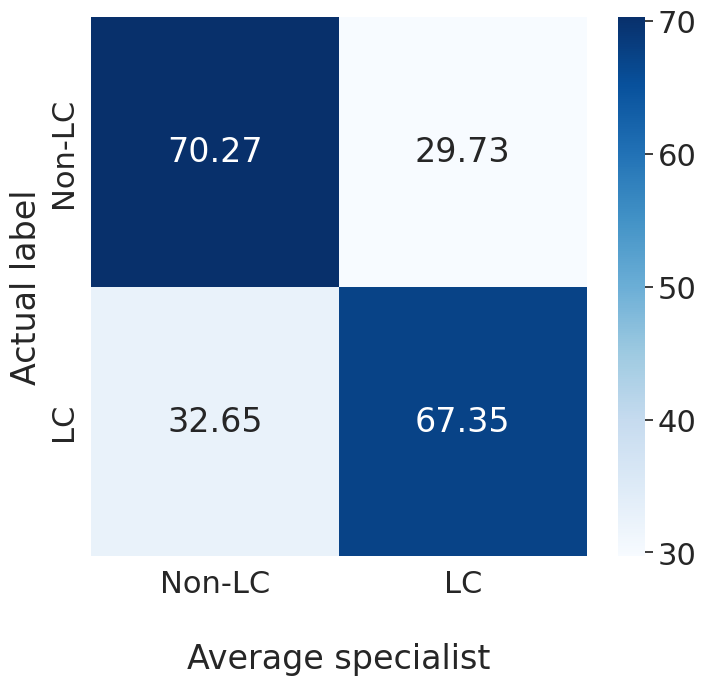

In [5]:
import pandas as pd
from plotFunctions import NormalizedCM_plot
df=pd.read_pickle('Specialists.pkl')
TN = df.loc['TN', 'Majority vote']
FP = df.loc['FP', 'Majority vote']
FN = df.loc['FN', 'Majority vote']
TP = df.loc['TP', 'Majority vote']

NormalizedCM_plot(TN, FP, FN, TP, 'Average specialist', 'CM_specialists') # Plot normalized CM

## Confusion Matrix for validation data

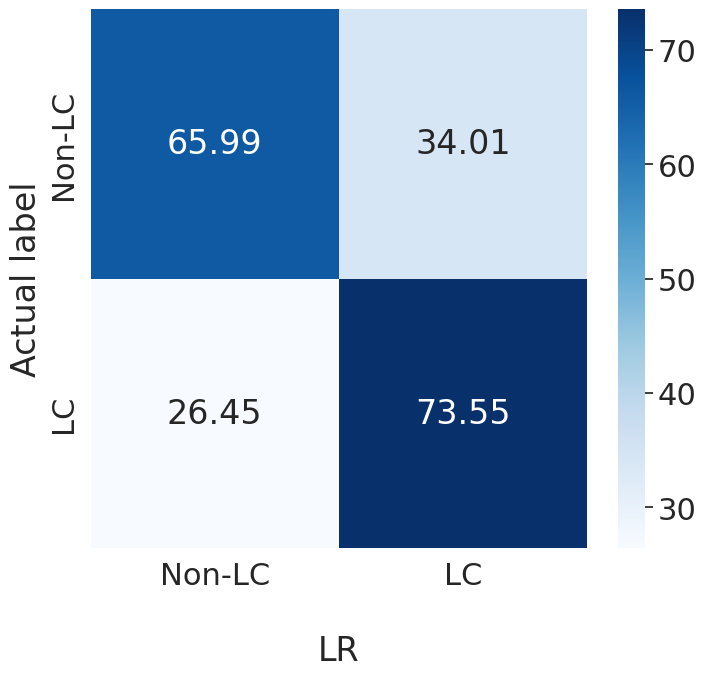

In [6]:
dfValResults=pd.read_pickle('Val_Results.pkl')
TN = dfValResults.loc['mean', 'TN']
FP = dfValResults.loc['mean', 'FP']
FN = dfValResults.loc['mean', 'FN']
TP = dfValResults.loc['mean', 'TP']

NormalizedCM_plot(TN, FP, FN, TP, 'LR', 'CM val LR_model')

## Confusion Matrix for the external validation data set

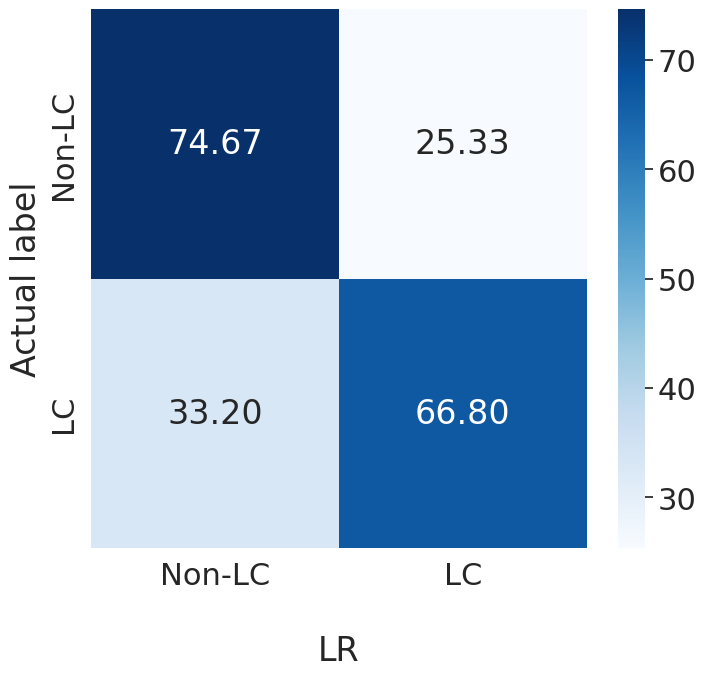

In [7]:
dfValResults=pd.read_pickle('200_Results.pkl')
TN = dfValResults.loc['mean', 'TN']
FP = dfValResults.loc['mean', 'FP']
FN = dfValResults.loc['mean', 'FN']
TP = dfValResults.loc['mean', 'TP']

NormalizedCM_plot(TN, FP, FN, TP, 'LR', 'CM 200 LR_model')

## ROC curve on external validation set to compare with specialists

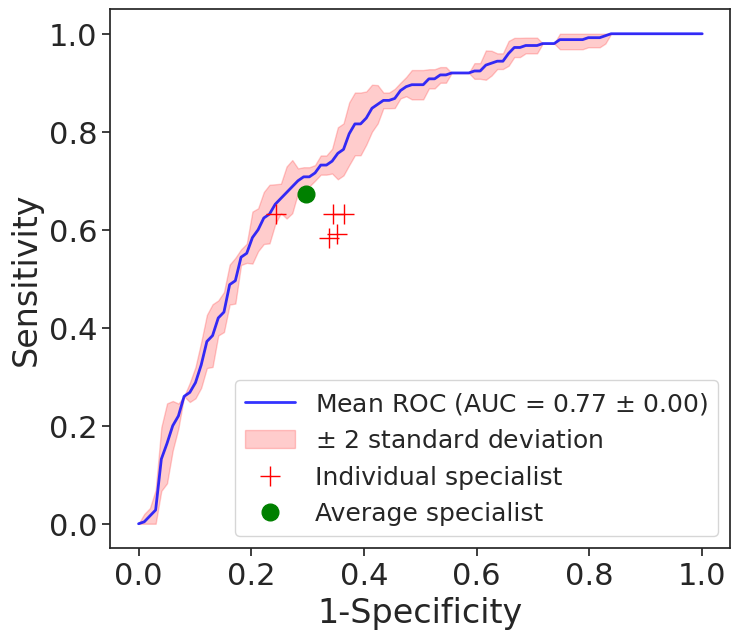

In [8]:
from plotFunctions import ROC_plot
dfROC=pd.read_pickle('200_ROC.pkl')

df=pd.read_pickle('Specialists.pkl')

ROC_plot(dfROC, 'ROC LR_model', df)

/work/Machine Learning Algorithms/Functions/Lung-Cancer-Detection-main/plotFunctions.py:155: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfPR['precision'][each] = dfPR['precision'][each][:min_length]
/work/Machine Learning Algorithms/Funct

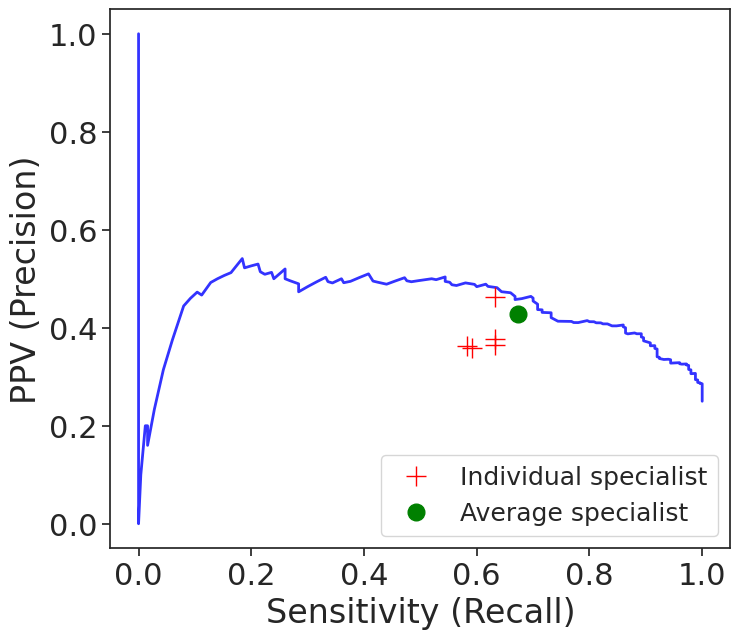

In [9]:
from plotFunctions import PR_plot
dfPR=pd.read_pickle('200_PR.pkl')

df=pd.read_pickle('Specialists.pkl')

PR_plot(dfPR, 'PR LR_model', df)

## Calibration curve

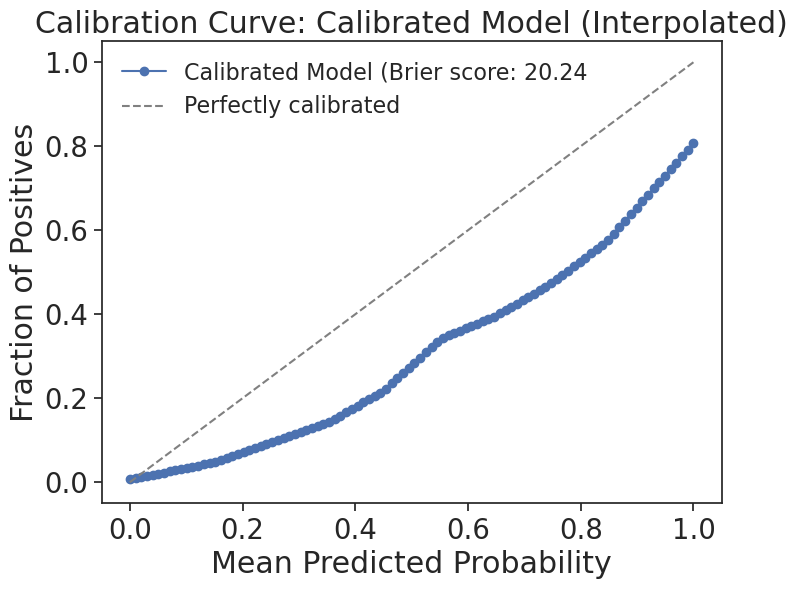

In [10]:
from plotFunctions import Calibration_curve_from_preds
dfpreds=pd.read_pickle('ValCalib.pkl')
Calibration_curve_from_preds(dfpreds,'Calibration.pdf')